In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import datasets
from sklearn import metrics
from sklearn.decomposition import PCA

In [120]:
housing = pd.DataFrame(pd.read_csv('./Housing.csv'))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [121]:
# Any dataset that has columns with values as 'Yes' or 'No', strings' values cannot be used.
# However, we can convert them to numerical values as binary.

varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

housing[varlist] = housing[varlist].apply(binary_map)

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [122]:
X = housing.values[:,1:12]
print('X =', X[0:5])
Y = housing.values[:,0]
print('Y =', Y[0:5])

X = [[7420 4 2 3 1 0 0 0 1 2 1]
 [8960 4 4 4 1 0 0 0 1 3 0]
 [9960 3 2 2 1 0 1 0 0 2 1]
 [7500 4 2 2 1 0 1 0 1 3 1]
 [7420 4 1 2 1 1 1 0 1 2 0]]
Y = [13300000 12250000 12250000 12215000 11410000]


In [123]:
# Using PCA feature extraction to simplify the features.  
pca = PCA(n_components = 5)
principalComponents = pca.fit_transform(X)
principalDF = pd.DataFrame(data = principalComponents)
principalDF.head()

,0,1,2,3,4
0,2269.459053,1.778122,0.735254,-0.106075,0.009872
1,3809.459246,3.041465,1.343588,-0.511131,-0.039062
2,4809.458889,0.031226,0.660674,0.119332,0.383147
3,2349.459169,1.116552,2.002901,0.607720,0.426455
4,2269.458964,0.721593,0.989470,0.646061,0.354564


In [124]:
# Splitting the datasets to training and validation sets.

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 0)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(436, 11) (109, 11) (436,) (109,)


In [125]:
# Feature scaling between 0 and 1 for independent variables using Standardization.

from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc_X = StandardScaler()
X_train_sc = sc_X.fit_transform(X_train)
X_test_sc = sc_X.fit_transform(X_test)

In [126]:
model_lin = SVR(kernel = 'linear', C = 1e6)
model_lin.fit(X_train_sc,Y_train)
Y_pred_lin = model_lin.predict(X_test_sc)
model_poly = SVR(kernel = 'poly', C = 1e5)
model_poly.fit(X_train_sc,Y_train)
Y_pred_poly = model_poly.predict(X_test_sc)
model_rbf = SVR(kernel = 'rbf', C = 1e6)
model_rbf.fit(X_train_sc,Y_train)
Y_pred_rbf = model_rbf.predict(X_test_sc)
predictions = pd.DataFrame({'Y_test':Y_test, 'Y_pred_lin':Y_pred_lin, 'Y_pred_poly':Y_pred_poly, 'Y_pred_rbf':Y_pred_rbf})
predictions.head()

,Y_test,Y_pred_lin,Y_pred_poly,Y_pred_rbf
0,4585000,3.820968e+06,4.239322e+06,4.096547e+06
1,6083000,5.952978e+06,5.423169e+06,5.845980e+06
2,4007500,4.309663e+06,4.320486e+06,4.138216e+06
3,6930000,6.401910e+06,5.029958e+06,5.216961e+06
4,2940000,3.294395e+06,3.718290e+06,3.304695e+06


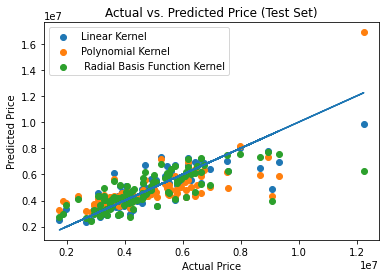

In [127]:
plt.scatter(Y_test, Y_pred_lin, label = 'Linear Kernel')
plt.scatter(Y_test, Y_pred_poly, label = 'Polynomial Kernel')
plt.scatter(Y_test, Y_pred_rbf, label = ' Radial Basis Function Kernel')
plt.plot(Y_test, Y_test)

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Price (Test Set)")
plt.legend()
plt.show()

In [128]:
print("Accuracy of Linear's model:", model_lin.score(X_test_sc, Y_test))
print("Accuracy of Polynomial's model:", model_poly.score(X_test_sc, Y_test))
print("Accuracy of Radial Basis Function's model:", model_rbf.score(X_test_sc, Y_test))

Accuracy of Linear's model: 0.6773539534225805
Accuracy of Polynomial's model: 0.5314979804251989
Accuracy of Radial Basis Function's model: 0.5742708039205635


In [129]:
# Implementation SVR Regression (Linear Kernel) over the numbers of principal components from PCA extraction scaling. 

Prin_Comp = []
Accuracy = []
max_accuracy = 0 
max_comp = 0

N_Comp = range(1,11)
for N in N_Comp:
    Prin_Comp.append(N)
    pca = PCA(n_components = N)
    principalComponents = pca.fit_transform(X)
    principalDF = pd.DataFrame(data = principalComponents)
    X_train, X_test, Y_train, Y_test = train_test_split(principalDF, Y, test_size=0.2, random_state = 0)
    sc_X = StandardScaler()
    X_train_sc = sc_X.fit_transform(X_train)
    X_test_sc = sc_X.fit_transform(X_test)
    model_lin = SVR(kernel = 'linear', C = 1e6)
    model_lin.fit(X_train_sc,Y_train)
    Y_pred_lin = model_lin.predict(X_test_sc)
    Accuracy.append(model_lin.score(X_test_sc, Y_test))
    if model_lin.score(X_test_sc, Y_test) > max_accuracy:
        max_comp = N
        max_accuracy = model_lin.score(X_test_sc, Y_test)
print("The N of principal components with the highest accuracy is:", max_comp, "components with the accuracy of", max_accuracy)

The N of principal components with the highest accuracy is: 8 components with the accuracy of 0.6881920717759469


In [130]:
print(Prin_Comp)
print(Accuracy)
plt.plot(Prin_Comp, Accuracy)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[0.3023594009308127, 0.5528365189443136, 0.576537771038768, 0.5715492344458644, 0.6430060279189678, 0.668765325358182, 0.6675584538632138, 0.6881920717759469, 0.6840595209151683, 0.6855437496207218]
